# Pembuatan AI penyelesai permainan katla menggunakan Shannon Entropy

### Mengambil semua kata 5 huruf dari semua kata di kbbi
#### hasil reverse engineering official kbbi app
##### sumber : https://github.com/damzaky/kumpulan-kata-bahasa-indonesia-KBBI

In [ ]:
import re

# Load the possible words from wordle.txt file
with open('indonesian-words.txt', 'r') as f:
    words = f.read().splitlines()

# Filter words with non-letter characters
words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and len(word) == 5]

# Write filtered words to a new file
with open('wordle_indonesia.txt', 'w') as f:
    f.write('\n'.join(words))


#### total kata di dataset yang digunakan

In [1]:
# count all word in wordle_indonesia.txt
count = 0
with open('katla_allwords.txt', 'r') as f:
    #for every line in file
    for line in f:
        #split the line into words
        words = line.split()
        #increase count by number of words in line
        count += len(words)

print('jumlah kata : ', count)


jumlah kata :  5430


### Penebakan warna

In [11]:
def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    result.append('y')  # Letter appears more in the guess word, mark as '-'
                    match_found = False
                    break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    # Turn result into a string
    result = ''.join(result)
    return result

guess_word = input("masukkan guess word: ")
final_word = input("masukkan final word: ")
answer = wordle_result(guess_word, final_word)
print ("kata tebakan : ", guess_word)
print ("kata rahasia : ", final_word)
print("kombinasi warna: ", answer)

kata tebakan :  mobil
kata rahasia :  mules
kombinasi warna:  g---y


### Distribusi jawaban per huruf

In [15]:
def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    result.append('y')  # Letter appears more in the guess word, mark as '-'
                    match_found = False
                    break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    return tuple(result)


results_count = {}
total_count = 0
guess_word = input ('Masukkan guess word : ')

with open('katla_allwords.txt', 'r') as inner_file:
    for line in inner_file:
        final_word = line.strip()
        result = wordle_result(guess_word, final_word)

        # Update the count for each result array
        if result in results_count:
            results_count[result] += 1
        else:
            results_count[result] = 1

        total_count += 1

# Print all the results and their counts
for result, count in results_count.items():
    print(f"Result: {result} - Count: {count}")


Result: ('y', 'y', '-', '-', '-') - Count: 128
Result: ('-', 'g', '-', 'y', '-') - Count: 67
Result: ('y', '-', 'g', '-', '-') - Count: 22
Result: ('-', '-', 'g', 'y', '-') - Count: 22
Result: ('y', '-', '-', 'g', 'y') - Count: 19
Result: ('-', 'y', '-', '-', '-') - Count: 396
Result: ('-', '-', 'g', 'g', '-') - Count: 24
Result: ('-', 'g', '-', 'g', 'y') - Count: 27
Result: ('-', '-', '-', '-', '-') - Count: 312
Result: ('g', 'y', 'y', '-', '-') - Count: 12
Result: ('g', '-', '-', 'y', '-') - Count: 14
Result: ('-', '-', '-', 'g', '-') - Count: 116
Result: ('-', 'g', '-', 'g', '-') - Count: 97
Result: ('y', 'g', '-', '-', '-') - Count: 127
Result: ('y', '-', '-', '-', 'y') - Count: 42
Result: ('-', '-', '-', 'y', 'y') - Count: 40
Result: ('-', 'g', '-', '-', 'y') - Count: 106
Result: ('y', '-', '-', 'g', '-') - Count: 57
Result: ('-', 'y', 'y', '-', 'y') - Count: 24
Result: ('-', '-', '-', 'g', 'g') - Count: 53
Result: ('-', 'g', '-', '-', 'g') - Count: 76
Result: ('y', 'y', 'y', '-',

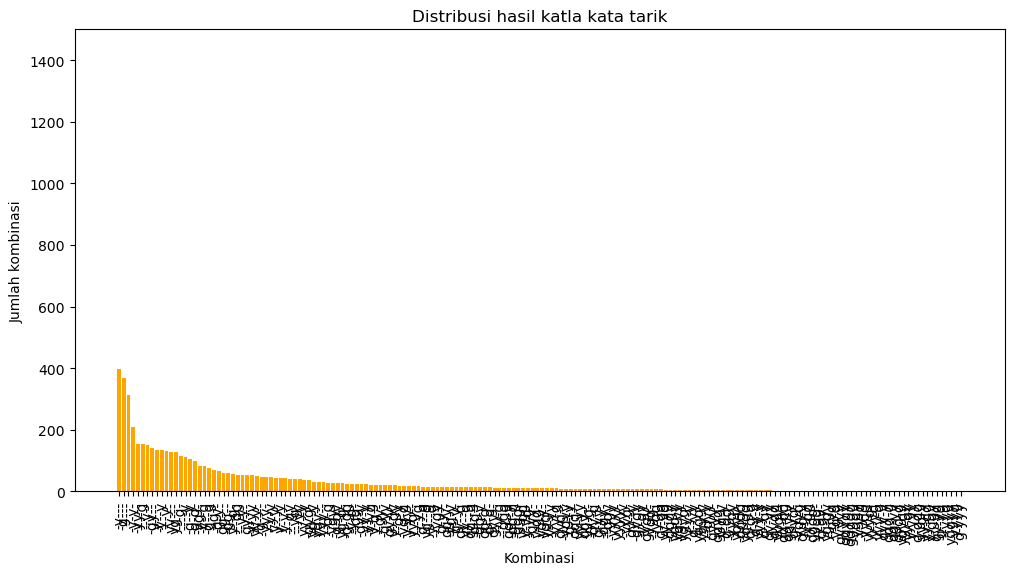

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the count_result dictionary into separate arrays for combination and count
combinations = []
counts = []

for combination, count in results_count.items():
    combinations.append("".join(combination))
    counts.append(count)

# Sort the combinations and counts in descending order based on the counts
sorted_indices = np.argsort(counts)[::-1]
combinations = np.array(combinations)[sorted_indices]
counts = np.array(counts)[sorted_indices]


# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(combinations, counts)
plt.bar(combinations, counts, color='orange')

# Set the Y-axis limit to 500
plt.ylim(0, 1500)

title = 'Distribusi hasil katla kata ' + guess_word

# Customize the plot
plt.xlabel("Kombinasi")
plt.ylabel("Jumlah kombinasi")
plt.title(title)
plt.xticks(rotation=90)

# Display the plot
plt.show()


### Pencarian kata dengan entropi tertinggi

In [18]:
import math

def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    result.append('y')  # Letter appears more in the guess word, mark as '-'
                    match_found = False
                    break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    return result

# Open the wordle_indonesia.txt file
with open('katla_allwords.txt', 'r') as file:
    word_scores = []

    for guess_word in file:
        guess_word = guess_word.strip()
        results_count = {}
        total_count = 0

        # Open the wordle_indonesia.txt file again to process each final word
        with open('katla_allwords.txt', 'r') as inner_file:
            for line in inner_file:
                final_word = line.strip()
                result = tuple(wordle_result(guess_word, final_word))

                # Update the count for each result array
                if result in results_count:
                    results_count[result] += 1
                else:
                    results_count[result] = 1

                total_count += 1

        entropy_total = 0

        # Calculate the probability multiplied by log(1/probability) for each result array
        for result, count in results_count.items():
            probability = count / total_count
            log_probability = math.log2(1 / probability)
            entropy = probability * log_probability
            entropy_total += entropy

        word_scores.append((guess_word, entropy_total))

    # Sort the word scores in descending order based on entropy_total
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Print the top 10 words with the highest entropy_total
    for word, entropy_total in word_scores[:10]:
        print(f'{word}: {entropy_total}')

In [17]:
import matplotlib.pyplot as plt

# Extract the words and entropy scores from word_scores
words = [word for word, _ in word_scores]
entropy_scores = [entropy for _, entropy in word_scores]

words = [word for word, _ in word_scores[:10]]
entropy_scores = [entropy for _, entropy in word_scores[:10]]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, entropy_scores)

# Customize the plot
plt.xlabel("Words")
plt.ylabel("Entropy Total")
plt.title("Word Scores (Entropy Total)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


NameError: name 'word_scores' is not defined

### Katla AI test

In [ ]:
import math

eligible_words = []

def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    result.append('y')  # Letter appears more in the guess word, mark as '-'
                    match_found = False
                    break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    # Turn result into a string
    result = ''.join(result)
    return result


def calculate_entropy(guess_word):
    results_count = {}
    total_count = len(eligible_words)

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        if result in results_count:
            results_count[result] += 1
        else:
            results_count[result] = 1

    entropy_total = 0

    for result, count in results_count.items():
        probability = count / total_count
        entropy = probability * math.log2(1/probability)
        entropy_total += entropy

    return entropy_total


def find_top_entropy_words(guess_word, combination):
    new_eligible = []

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        # Update the count for each result array
        if result == combination:
            # Insert into new_eligible
            new_eligible.append(final_word)

    # Clear eligible_words and replace it with new_eligible
    eligible_words.clear()
    eligible_words.extend(new_eligible)

    word_scores = []

    for word in eligible_words:
        entropy_total = calculate_entropy(word)
        word_scores.append((word, entropy_total))

    # Sort the word scores in descending order based on entropy_total
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Return the top 10 eligible words with their entropy scores and updated eligible_words
    return word_scores[:5]


# Example usage:
with open('wordle_indonesia.txt', 'r') as file:
    eligible_words = [line.strip() for line in file]
    all_words = [line.strip() for line in file]

loop_count = 0

while True:
    loop_count += 1
    guess_word = input("Masukkan kata tebakan: ")
    combination = input("Masukkan kombinasi warna: ")

    if combination == 'ggggg':
        print("You win!")
        break

    top_entropy_words = find_top_entropy_words(guess_word, combination)

    if not top_entropy_words:
        print("Kombinasi tidak ditemukan.")
        break
    else:
        # Print the top 10 eligible words with their entropy scores
        for word, entropy_total in top_entropy_words:
            print(f'{word}: {entropy_total}')

    print()  # Add a new line for separation

print(f"Jumlah Percobaan: {loop_count}")

### simulasi permainan katla 
#### semua huruf di dataset menjadi kata rahasia dan kaat tebaknya 10 kata dengan entropi tertinggi

In [19]:
import math

eligible_words = []

def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            if guess_letters[:i].count(guess_letter) < final_letters.count(guess_letter):
                result.append('y')  # Letter appears in a different place
            else:
                result.append('-')  # Letter appears more in the guess word, mark as '-'
        else:
            result.append('-')  # Letter not in the final word

    # Turn result into a string
    result = ''.join(result)
    return result


def calculate_entropy(guess_word):
    results_count = {}
    total_count = len(eligible_words)

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        if result in results_count:
            results_count[result] += 1
        else:
            results_count[result] = 1

    entropy_total = 0

    for result, count in results_count.items():
        probability = count / total_count
        entropy = -probability * math.log2(probability)
        entropy_total += entropy

    return entropy_total


def find_top_entropy_words(guess_word, combination):
    new_eligible = []

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        # Update the count for each result array
        if result == combination:
            # Insert into new_eligible
            new_eligible.append(final_word)

    # Clear eligible_words and replace it with new_eligible
    eligible_words.clear()
    eligible_words.extend(new_eligible)

    word_scores = []

    for word in eligible_words:
        entropy_total = calculate_entropy(word)
        word_scores.append((word, entropy_total))

    # Sort the word scores in descending order based on entropy_total
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Return the top 10 eligible words with their entropy scores and updated eligible_words
    return word_scores[:1]


# Example usage:
guess_array = ['tarik']

for best_words in guess_array:
    total_tries = 0
    total_loop = 0
    lost_count = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0

    with open('katla_allwords.txt', 'r') as file:
        final_arr = [line.strip() for line in file]

    for final_word in final_arr:
        guess_word = best_words
        loop_count = 0
        with open('katla_allwords.txt', 'r') as file:
            eligible_words = [line.strip() for line in file]

        loop_count += 1
        combination = wordle_result(guess_word, final_word)
        find_top_entropy_words(guess_word, combination)
        if combination == 'ggggg':
            print(best_words, " -> ", final_word)
        else:
            top_entropy_words = find_top_entropy_words(guess_word, combination)
            for word, entropy_total in top_entropy_words:
                guess_word = word
            while True:
                loop_count += 1
                combination = wordle_result(guess_word, final_word)

                if combination == 'ggggg':
                    break

                top_entropy_words = find_top_entropy_words(guess_word, combination)

                if not top_entropy_words:
                    break
                else:
                    for word, entropy_total in top_entropy_words:
                        guess_word = word
                

        if loop_count == 1:
            count_1 += 1
        if loop_count == 2:
            count_2 += 1
        if loop_count == 3:
            count_3 += 1
        if loop_count == 4:
            count_4 += 1
        if loop_count == 5:
            count_5 += 1
        if loop_count == 6:
            count_6 += 1
        if loop_count > 6: 
            lost_count += 1
        total_loop += loop_count
        total_tries += 1

    avg_loop = total_loop/total_tries
    print(best_words, " = ", avg_loop)
    print("lost = ", lost_count)

    win_rate = 1-(lost_count/1473)
    with open('wordleSimulationResult.txt', 'a') as file:
        file.write(f"{best_words}: {avg_loop}\n")
        file.write(f"lost: {lost_count}\n")
        file.write(f"win rate: {win_rate}\n")
        file.write(f"1st try: {count_1}\n")
        file.write(f"2nd try: {count_2}\n")
        file.write(f"3rd try: {count_3}\n")
        file.write(f"4th try: {count_4}\n")
        file.write(f"5th try: {count_5}\n")
        file.write(f"6th try: {count_6}\n")

KeyboardInterrupt: 

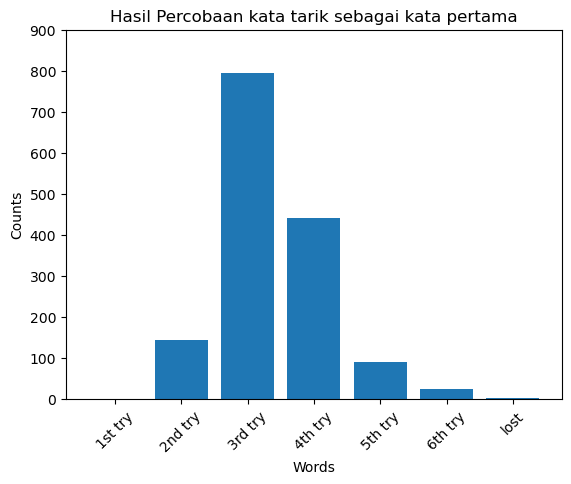

In [37]:
import matplotlib.pyplot as plt

# Data
# tarik: 3.373750832778148
# lost: 3
# win rate: 0.9979633401221996
# 1st try: 1
# 2nd try: 145
# 3rd try: 795
# 4th try: 442
# 5th try: 91
# 6th try: 24
words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 145, 795, 442, 91, 24,3]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata tarik sebagai kata pertama')
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.show()


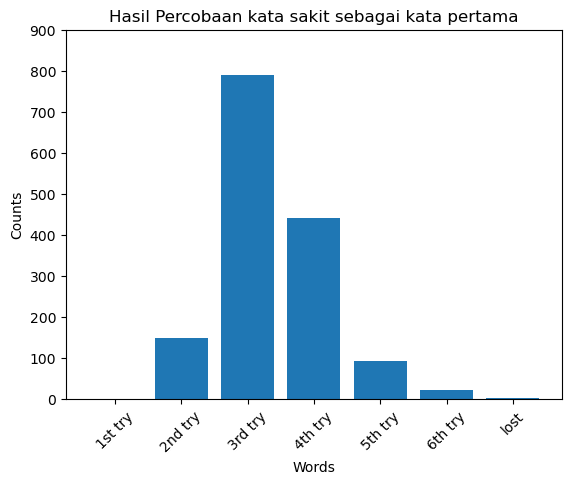

In [38]:
# Data
# sakit: 3.374417055296469
# lost: 4
# win rate: 0.9972844534962662
# 1st try: 1
# 2nd try: 149
# 3rd try: 789
# 4th try: 442
# 5th try: 93
# 6th try: 23
words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 149, 789, 442, 93, 23,4]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata sakit sebagai kata pertama')
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.show()

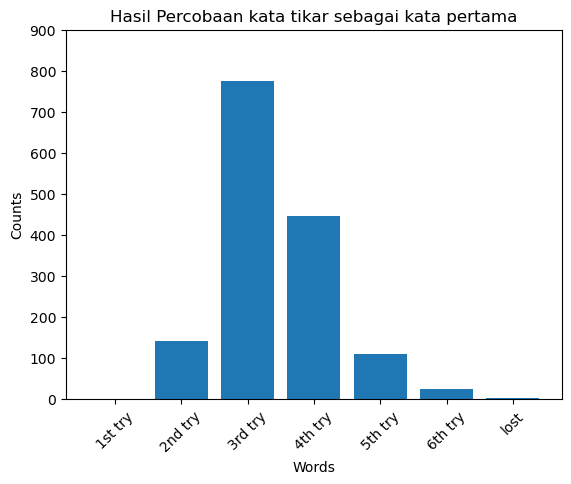

In [39]:
#data
# tikar: 3.4063957361758828
# lost: 4
# win rate: 0.9972844534962662
# 1st try: 1
# 2nd try: 142
# 3rd try: 774
# 4th try: 446
# 5th try: 110
# 6th try: 24

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 142, 774, 446, 110, 24,4]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata tikar sebagai kata pertama')
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.show()

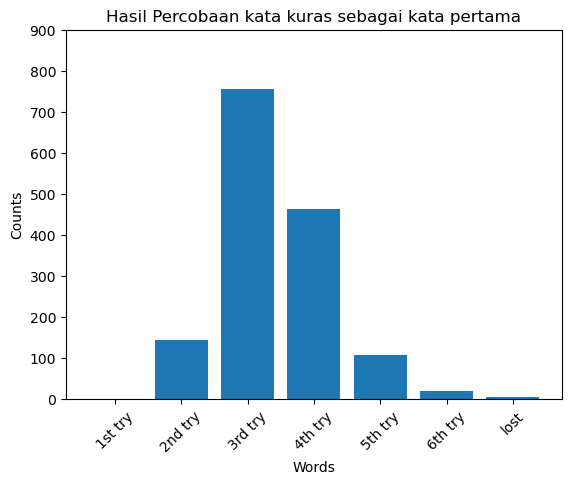

In [40]:
# kuras: 3.413057961359094
# lost: 6
# win rate: 0.9959266802443992
# 1st try: 1
# 2nd try: 145
# 3rd try: 756
# 4th try: 464
# 5th try: 108
# 6th try: 21

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 145, 756, 464, 108, 21,6]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata kuras sebagai kata pertama')
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.show()

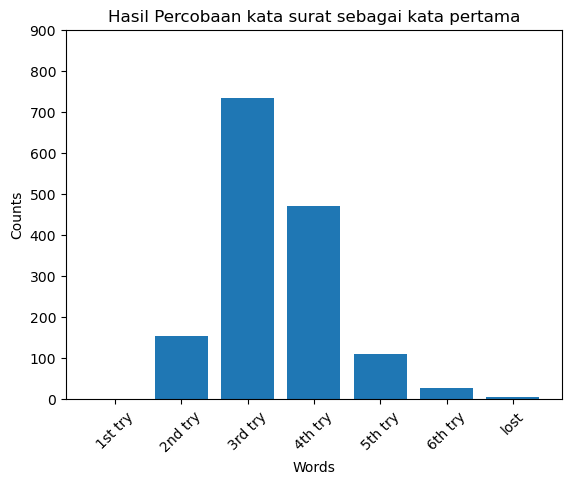

In [41]:
# surat: 3.423717521652232
# lost: 5
# win rate: 0.9966055668703326
# 1st try: 1
# 2nd try: 154
# 3rd try: 734
# 4th try: 470
# 5th try: 110
# 6th try: 27

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 154, 734, 470, 110, 27,5]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata surat sebagai kata pertama')
plt.ylim(0, 900)
plt.xticks(rotation=45)
plt.show()

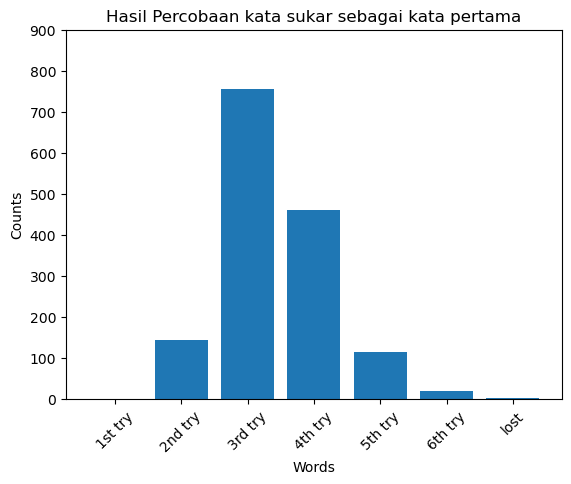

In [42]:
# sukar: 3.4157228514323785
# lost: 4
# win rate: 0.9972844534962662
# 1st try: 1
# 2nd try: 144
# 3rd try: 755
# 4th try: 461
# 5th try: 115
# 6th try: 21

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 144, 755, 461, 115, 21,4]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata sukar sebagai kata pertama')
plt.ylim(0, 900)
plt.xticks(rotation=45)
plt.show()


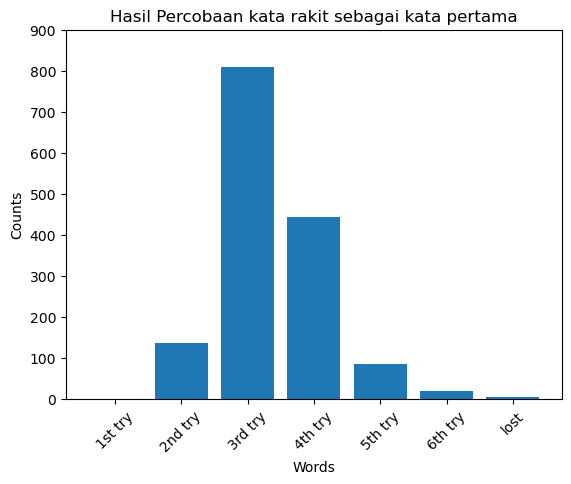

In [43]:
# rakit: 3.374417055296469
# lost: 5
# win rate: 0.9966055668703326
# 1st try: 1
# 2nd try: 136
# 3rd try: 808
# 4th try: 444
# 5th try: 86
# 6th try: 21

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 136, 808, 444, 86, 21,5]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata rakit sebagai kata pertama')
plt.ylim(0, 900)
plt.xticks(rotation=45)
plt.show()

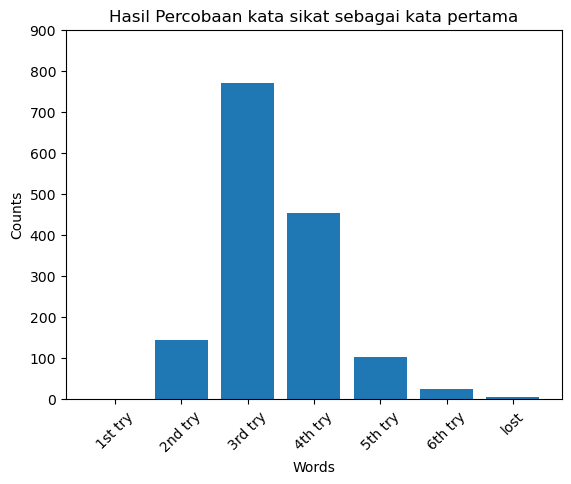

In [44]:
# sikat: 3.403730846102598
# lost: 5
# win rate: 0.9966055668703326
# 1st try: 1
# 2nd try: 144
# 3rd try: 770
# 4th try: 454
# 5th try: 103
# 6th try: 24

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 144, 770, 454, 103, 24,5]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata sikat sebagai kata pertama')
plt.ylim(0, 900)
plt.xticks(rotation=45)
plt.show()

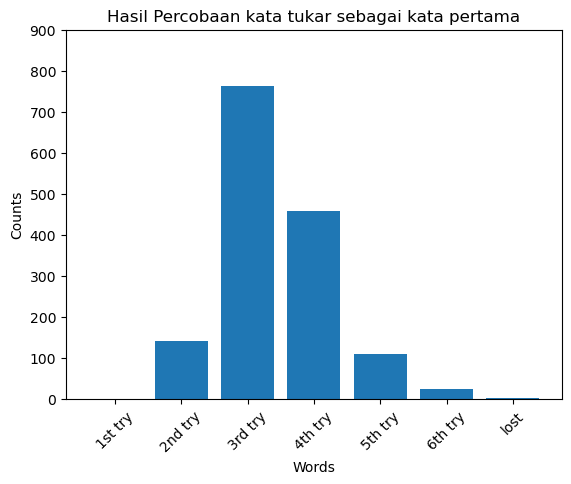

In [46]:
# tukar: 3.414390406395736
# lost: 4
# win rate: 0.9972844534962662
# 1st try: 1
# 2nd try: 141
# 3rd try: 763
# 4th try: 459
# 5th try: 109
# 6th try: 24

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 141, 763, 459, 109, 24,4]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Percobaan kata tukar sebagai kata pertama')
plt.ylim(0, 900)
plt.xticks(rotation=45)
plt.show()